Most of this code can be found at <a href='https://keras.io'>keras.io</a>

### Questions
- How do we organize our workflow for NN
    - Is there a graphic that displays this?
- Train/Test/Validation hold out


### Objectives
YWBAT
- optimize NNs by tuning hyperparameters
- explain various parameters of our NN hyperparameters
    - i.e. tuning 'meta-parameters'

# Useful Inputs

In [15]:
import keras
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [16]:
from keras import models
from keras import layers
from keras import optimizers

# Obtaining Dataset & Train-Test Split

Nothing different from training other models

In [17]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

iris = load_iris()
x = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# One hot encoding
enc = OneHotEncoder()
y = enc.fit_transform(y[:, np.newaxis]).toarray()

# Scale data to have mean 0 and variance 1 
# which is importance for convergence of the neural network
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Split the data set into training and testing
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.4, random_state=2)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [20]:
df = pd.read_csv("MagicTelescope.csv")
df.drop("ID", axis=1, inplace=True)
df.head(2)

,fLength:,fWidth:,fSize:,fConc:,fConc1:,fAsym:,fM3Long:,fM3Trans:,fAlpha:,fDist:,class:
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g


In [27]:
X = df.drop("class:", axis=1)
y = df["class:"]

In [28]:
enc = OneHotEncoder()

In [29]:
y = enc.fit_transform(y[:, np.newaxis]).toarray()
y[:3]

array([[1., 0.],
       [1., 0.],
       [1., 0.]])

In [30]:
# Scale data to have mean 0 and variance 1 
# which is importance for convergence of the neural network
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.4, random_state=2)

In [47]:
x_train.shape, y_train.shape

((11412, 10), (11412, 2))

# Creating a Neural Network

`Sequential` is referring to the neural networks we've observed. There are other neural network models that will go beyond this class.

In [58]:
from keras.models import Sequential

model = Sequential()

The actual network; we can decide how many layers & nodes for each layer here as well as other hyperparameters like the activation function.

In [59]:
from keras.layers import Dense

model.add(Dense(units=16, activation='relu', input_dim=10))
model.add(Dense(units=2, activation='softmax'))

Compile the model to a form that the computer can more easily work with

In [60]:
model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer=optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True))

In [61]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 16)                176       
_________________________________________________________________
dense_18 (Dense)             (None, 2)                 34        
Total params: 210
Trainable params: 210
Non-trainable params: 0
_________________________________________________________________


# Using the Model

Using the model structure, we do sequences of feedfoward and then backpropagation to adjust the weights and biases (training/fitting)

In [62]:
history = model.fit(x_train, y_train, epochs=100, batch_size=16, verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
11412/11412 [==============================] - 1s 129us/step - loss: 0.5301
Epoch 2/100
11412/11412 [==============================] - 1s 78us/step - loss: 0.4314: 0s - loss
Epoch 3/100
11412/11412 [==============================] - 1s 70us/step - loss: 0.4006
Epoch 4/100
11412/11412 [==============================] - 1s 72us/step - loss: 0.3845
Epoch 5/100
11412/11412 [==============================] - 1s 67us/step - loss: 0.3746
Epoch 6/100
11412/11412 [==============================] - 1s 83us/step - loss: 0.3675
Epoch 7/100
11412/11412 [==============================] - 1s 90us/step - loss: 0.3618: 0
Epoch 8/100
11412/11412 [==============================] - 1s 87us/step - loss: 0.3572: 0s - loss - ETA: 0s - loss: 0.
Epoch 9/100
11412/11412 [==============================] - 1s 88us/step - loss: 0.3531
Epoch 10/100
11412/11412 [==============================] - 1s 105us/step - loss: 0.3501 0s - loss: 0.3
Epoch 11/100
11412

11412/11412 [==============================] - 1s 80us/step - loss: 0.3132: 0s - loss: 0.3 - ETA: 0s - loss: 0.30 - ETA: 0s - loss: 0.3 - ETA: 0s - loss: 0
Epoch 83/100
11412/11412 [==============================] - 1s 92us/step - loss: 0.3126
Epoch 84/100
11412/11412 [==============================] - 1s 84us/step - loss: 0.3131
Epoch 85/100
11412/11412 [==============================] - 1s 83us/step - loss: 0.3125: 0s - loss: 0.313 - ETA: 0s - loss: 0.
Epoch 86/100
11412/11412 [==============================] - 1s 73us/step - loss: 0.3118
Epoch 87/100
11412/11412 [==============================] - 1s 68us/step - loss: 0.3117
Epoch 88/100
11412/11412 [==============================] - 1s 84us/step - loss: 0.3114
Epoch 89/100
11412/11412 [==============================] - 1s 90us/step - loss: 0.3117: 0s - lo
Epoch 90/100
11412/11412 [==============================] - 1s 93us/step - loss: 0.3114: 0s 
Epoch 91/100
11412/11412 [==============================] - 1s 87us/step - loss: 0.3111

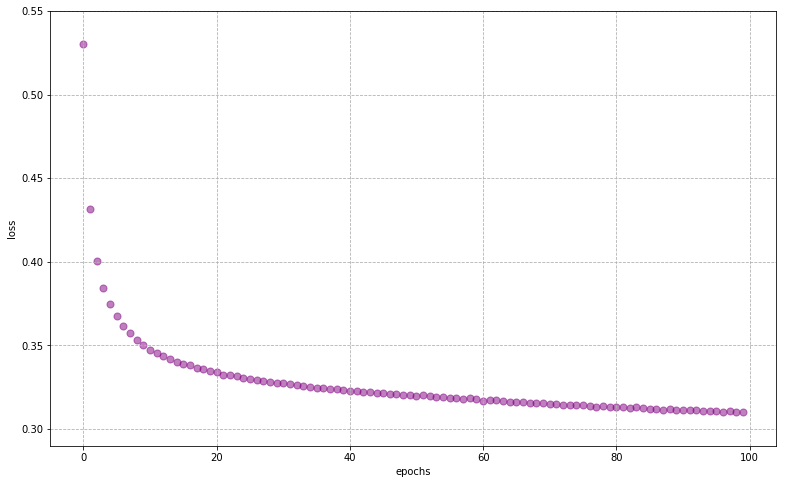

In [65]:
def plot_history(history, figsize=(13, 8), color='purple', s=50, alpha=0.5):
    plt.figure(figsize=figsize)
    plt.grid(zorder=0, linestyle='--')
    plt.scatter(history.epoch, history.history["loss"], c=color, s=s, alpha=alpha)
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.show()
    
    
plot_history(history)

In [71]:
### Let's build a new model and add another layer
model_mlp = Sequential()

model_mlp.add(Dense(input_dim=10, units=4, activation='relu'))
model_mlp.add(Dense(units=16, activation='relu'))
model_mlp.add(Dense(units=2, activation='softmax'))

# Relu is used to solve the vanishing gradient that is introduced by sigmoid functions
# Leaky Relu allows weights with negative parameters to update slowly


# Last layer classifiers usually use 'softmax' if ydim > 1 or 'sigmoid' if ydim == 1

model_mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 4)                 44        
_________________________________________________________________
dense_28 (Dense)             (None, 16)                80        
_________________________________________________________________
dense_29 (Dense)             (None, 2)                 34        
Total params: 158
Trainable params: 158
Non-trainable params: 0
_________________________________________________________________


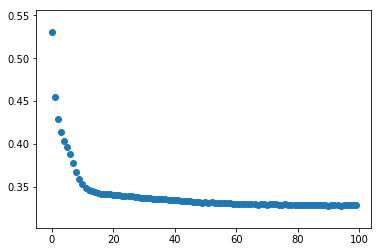

In [72]:
model_mlp.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer=optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True))

history = model_mlp.fit(x_train, y_train, epochs=100, batch_size=16, verbose=0)
plt.scatter(history.epoch, history.history["loss"])

### Let's try and tune our optimizer

In [112]:
optimizer_dict = {"adam_12": {"optimizer": optimizers.Adam(lr=0.01, epsilon=0.2, amsgrad=True), "color": "blue"}}
#                  "adam_01": {"optimizer": optimizers.Adam(lr=0.01), "color": "orange"}}
#                   "sgd_nag": {"optimizer": optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True), "color": "pink"},
#                   "sgd": {"optimizer": optimizers.SGD(lr=0.01), "color": "red"},
#                   "adagrad": {"optimizer": optimizers.Adagrad(), "color": "yellow"},
#                   "adadelta": {"optimizer": optimizers.Adadelta(), "color": "teal"}}



In [113]:
for label, optimizer in optimizer_dict.items():
    # Build Model
    model = Sequential()
    model.add(Dense(units=10, activation='relu', input_dim=10))
    model.add(Dense(units=2, activation='softmax'))
    
    # compile model
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer=optimizer['optimizer'], metrics=['accuracy'])
    
    # train our model and get our history
    history = model.fit(x_train, y_train, epochs=30, batch_size=16, verbose=1)
    
    # store history to our dictionary
    optimizer_dict[label]['history'] = history
    print(f"Finished fitting {label} optimizer")

Epoch 1/30
11412/11412 [==============================] - 3s 279us/step - loss: 0.5104 - acc: 0.7653 0s - loss: 0.5167 - acc: 0.76
Epoch 2/30
11412/11412 [==============================] - 2s 143us/step - loss: 0.3824 - acc: 0.8343
Epoch 3/30
11412/11412 [==============================] - 2s 136us/step - loss: 0.3620 - acc: 0.8516
Epoch 4/30
11412/11412 [==============================] - 2s 147us/step - loss: 0.3504 - acc: 0.8562 0s - loss: 0.3469 - a
Epoch 5/30
11412/11412 [==============================] - 2s 146us/step - loss: 0.3436 - acc: 0.8616
Epoch 6/30
11412/11412 [==============================] - 2s 139us/step - loss: 0.3385 - acc: 0.8632
Epoch 7/30
11412/11412 [==============================] - 2s 144us/step - loss: 0.3346 - acc: 0.8634
Epoch 8/30
11412/11412 [==============================] - 2s 142us/step - loss: 0.3311 - acc: 0.8644 0s - loss: 0.3296 - acc:  - ETA: 0s - loss: 0.3302 - acc: 0.8
Epoch 9/30
11412/11412 [==============================] - 2s 140us/step - loss

adam_12 0.31343910266778113


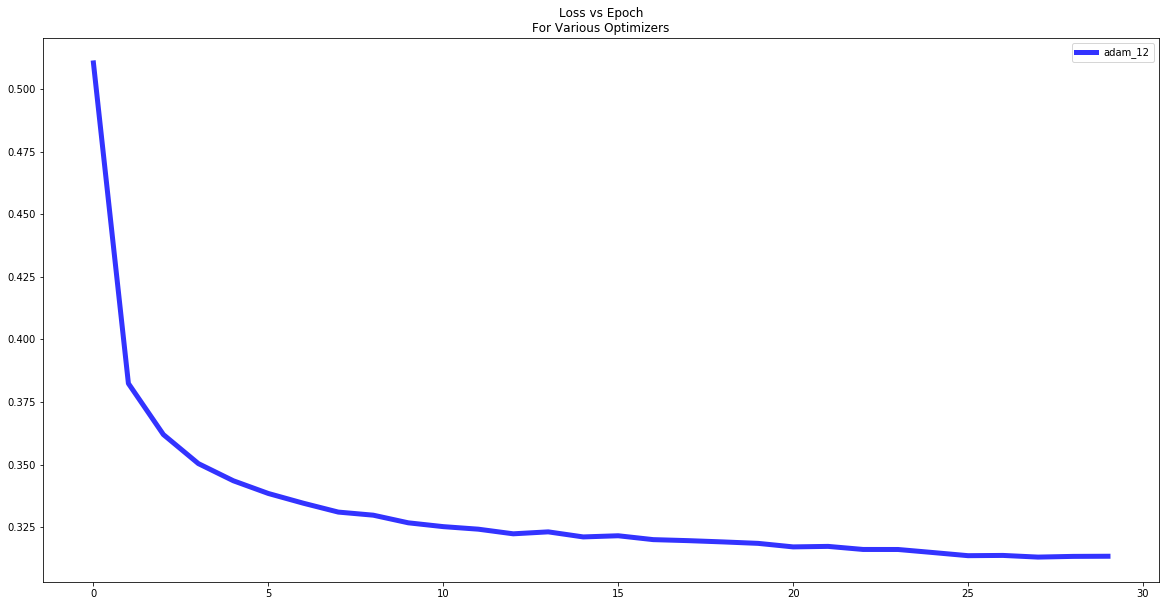

In [114]:
plt.figure(figsize=(20, 10))
for label, optdict in optimizer_dict.items():
    history = optdict['history']
    color = optdict["color"]
    plt.plot(history.epoch, history.history["loss"], alpha=0.8, color=color, label=label, linewidth=5)
    print(label, history.history["loss"][-1])
plt.legend()
plt.title("Loss vs Epoch\nFor Various Optimizers")
plt.show()

adam_12 0.8730283911671924


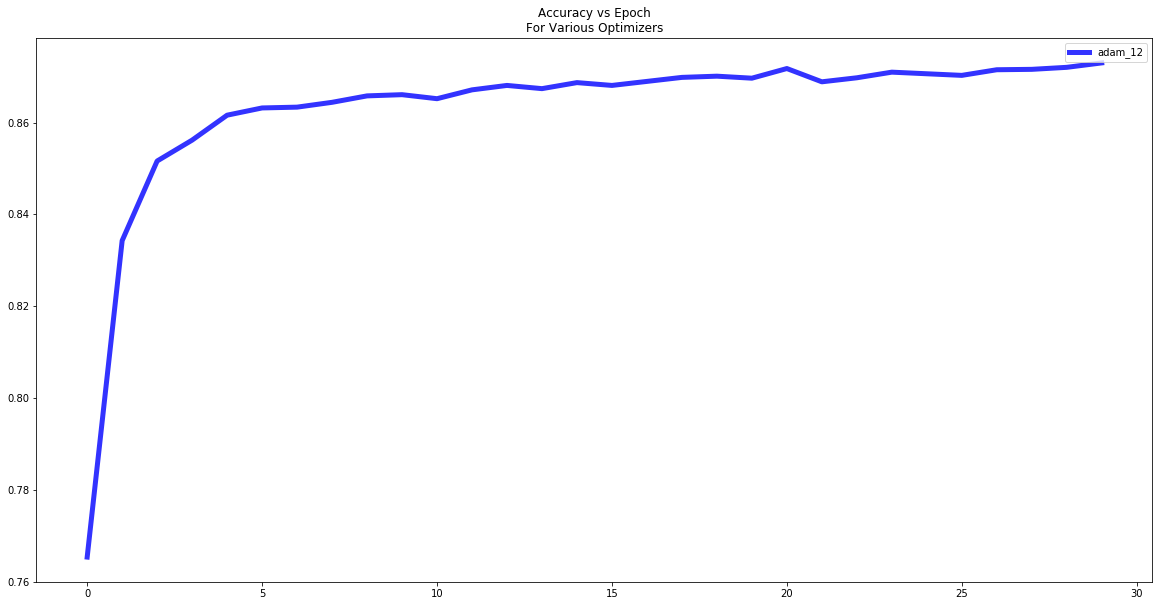

In [115]:
plt.figure(figsize=(20, 10))
for label, optdict in optimizer_dict.items():
    history = optdict['history']
    color = optdict["color"]
    plt.plot(history.epoch, history.history["acc"], alpha=0.8, color=color, label=label, linewidth=5)
    print(label, history.history["acc"][-1])
plt.legend()

plt.title("Accuracy vs Epoch\nFor Various Optimizers")
plt.show()

In [8]:
# alternatively could have specified a specific batch to train on
# model.train_on_batch(x_batch, y_batch)

# Evaluating the Trained Model

We can look at the overall loss from our test data after training the model was trained

In [18]:
# Could also just use a batch to evaluate
# loss_and_metrics = model.evaluate(x_test, y_test, batch_size=16)
loss_and_metrics = model.evaluate(x_test, y_test)

loss_and_metrics

60/60 [==============================] - 0s 38us/step


0.12374646763006845

We can have predictions (probability the data point is a particular class based on our trained model)

In [20]:
probs = model.predict(x_test)
probs

array([[9.83704627e-01, 1.57465991e-02, 5.48841897e-04],
       [9.88414645e-01, 1.13545572e-02, 2.30795253e-04],
       [4.83600445e-07, 2.06313543e-02, 9.79368210e-01],
       [9.77884471e-01, 2.18411200e-02, 2.74449092e-04],
       [9.82576132e-01, 1.67746786e-02, 6.49187947e-04],
       [2.56978660e-06, 3.25491428e-01, 6.74505949e-01],
       [9.41820860e-01, 5.75792976e-02, 5.99891879e-04],
       [5.99075367e-09, 2.19367836e-02, 9.78063285e-01],
       [3.57025236e-08, 3.38154845e-03, 9.96618390e-01],
       [9.73767519e-01, 2.58436427e-02, 3.88930697e-04],
       [9.68435526e-01, 2.88138203e-02, 2.75061140e-03],
       [9.88783300e-01, 1.10043641e-02, 2.12443832e-04],
       [9.83923614e-01, 1.55458329e-02, 5.30468358e-04],
       [9.51825023e-01, 4.10227664e-02, 7.15221046e-03],
       [9.16416869e-02, 8.26131165e-01, 8.22270438e-02],
       [6.93665788e-05, 8.83402765e-01, 1.16527863e-01],
       [5.03755331e-01, 4.96100485e-01, 1.44240723e-04],
       [9.63902846e-03, 9.85324

We want to say what is the predicted class, so we pick just the largest probability for each result

In [11]:
predictions = np.argmax(classes, axis=1)

predictions

array([0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 2, 1,
       2, 1, 1, 0, 0, 2, 0, 2, 2, 0, 1, 2, 1, 0, 2, 1, 1, 2, 1, 1, 2, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 2, 2, 0, 2, 2, 2, 1, 0])

Finally, we can see how accurate our model was by seeing if the predicted classes match the actual labels. Note that this is calculated differently from how the loss is calculated.

In [12]:
np.sum(predictions  == np.argmax(y_test, axis=1)) / predictions.shape

array([0.91666667])

### But Behold!!!! An out of the box RFC comes into the fold! 

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
clf = RandomForestClassifier()

In [15]:
clf.fit(x_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [16]:
clf.score(x_test, y_test)

0.9166666666666666